In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("e2e.csv", delimiter=";")

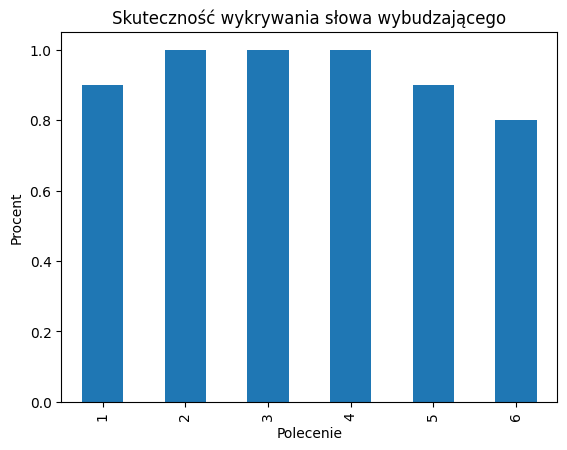

Średnia skuteczność wykrywania słowa wybudzającego: 93.33%


In [3]:
wykrycie = data.groupby("Polecenie")["Słowo wybudzające wykryte"].apply(
    lambda x: (x == "T").mean()
)
wykrycie.plot(kind="bar", title="Skuteczność wykrywania słowa wybudzającego")
plt.ylabel("Procent")
plt.show()

word_detected = data['Słowo wybudzające wykryte'] == 'T'
average_detection_efficiency = word_detected.mean() * 100
print(f'Średnia skuteczność wykrywania słowa wybudzającego: {average_detection_efficiency:.2f}%')

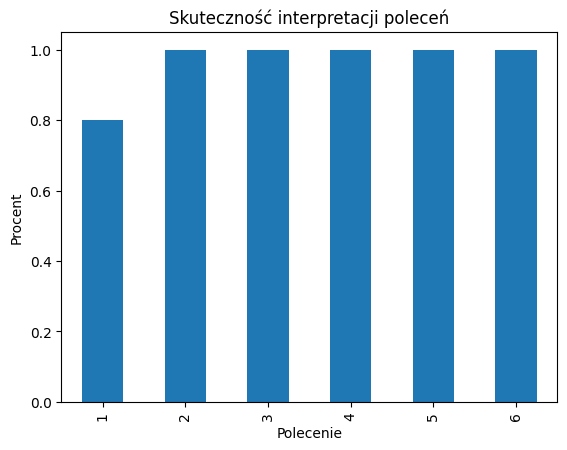

Średnia skuteczność prawidłowej interpretacji pytania: 96.67%


In [4]:
interpretacja = data.groupby("Polecenie")["Prawidłowa interpretacja"].apply(
    lambda x: (x == "T").mean()
)
interpretacja.plot(kind="bar", title="Skuteczność interpretacji poleceń")
plt.ylabel("Procent")
plt.show()

correct_interpretation = data['Prawidłowa interpretacja'] == 'T'
average_interpretation_efficiency = correct_interpretation.mean() * 100

print(f'Średnia skuteczność prawidłowej interpretacji pytania: {average_interpretation_efficiency:.2f}%')

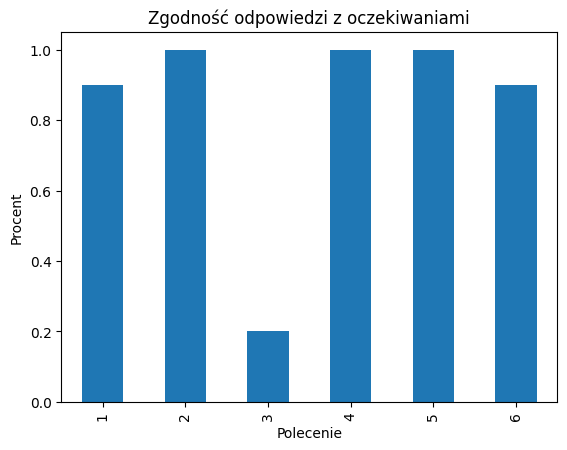

Średnia skuteczność odpowiedzi zgodnych z oczekiwaniami: 83.33%


In [5]:
zgodnosc = data.groupby("Polecenie")["Odpowiedź zgodna z oczekiwaniami"].apply(
    lambda x: (x == "T").mean()
)
zgodnosc.plot(kind="bar", title="Zgodność odpowiedzi z oczekiwaniami")
plt.ylabel("Procent")
plt.show()

correct_response = data['Odpowiedź zgodna z oczekiwaniami'] == 'T'
average_response_efficiency = correct_response.mean() * 100

print(f'Średnia skuteczność odpowiedzi zgodnych z oczekiwaniami: {average_response_efficiency:.2f}%')

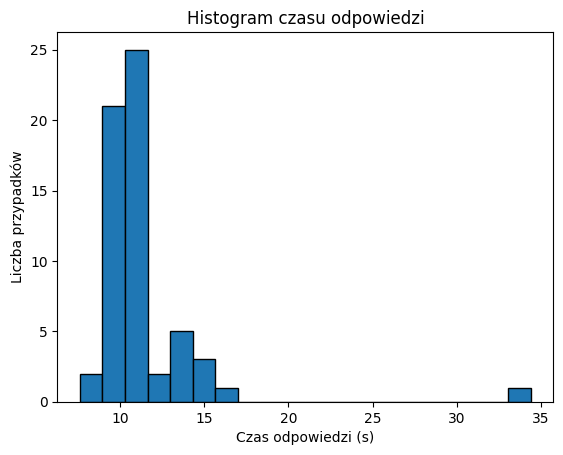

Średni czas odpowiedzi ogółem: 11.27 sekundy

Średni czas odpowiedzi dla każdego polecenia:
Polecenie
1     9.846
2    12.935
3    10.457
4    11.368
5    11.294
6    11.726
Name: Czas odpowiedzi, dtype: float64

Minimalny czas odpowiedzi: 7.63 sekundy
Maksymalny czas odpowiedzi: 34.40 sekundy

Odchylenie standardowe czasu odpowiedzi: 3.50 sekundy


In [6]:
plt.hist(data["Czas odpowiedzi"], bins=20, edgecolor="k")
plt.title("Histogram czasu odpowiedzi")
plt.xlabel("Czas odpowiedzi (s)")
plt.ylabel("Liczba przypadków")
plt.show()

average_response_time = data['Czas odpowiedzi'].mean()
print(f'Średni czas odpowiedzi ogółem: {average_response_time:.2f} sekundy')

average_response_time_per_command = data.groupby('Polecenie')['Czas odpowiedzi'].mean()
print('\nŚredni czas odpowiedzi dla każdego polecenia:')
print(average_response_time_per_command)

min_response_time = data['Czas odpowiedzi'].min()
max_response_time = data['Czas odpowiedzi'].max()
print(f'\nMinimalny czas odpowiedzi: {min_response_time:.2f} sekundy')
print(f'Maksymalny czas odpowiedzi: {max_response_time:.2f} sekundy')

std_dev_response_time = data['Czas odpowiedzi'].std()
print(f'\nOdchylenie standardowe czasu odpowiedzi: {std_dev_response_time:.2f} sekundy')

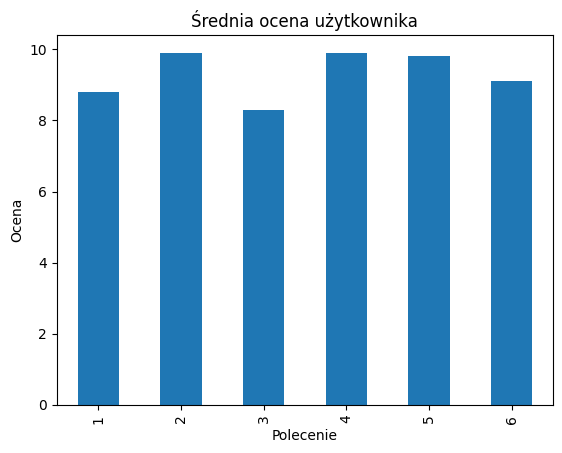

Średnia ocena użytkownika: 9.30
Minimalna ocena użytkownika: 3
Maksymalna ocena użytkownika: 10
Odchylenie standardowe oceny użytkownika: 1.38

Rozkład ocen:
Ocena użytkownika
3      1
5      2
7      1
8      6
9     10
10    40
Name: count, dtype: int64

Średnia ocena użytkownika dla każdego polecenia:
Polecenie
1    8.8
2    9.9
3    8.3
4    9.9
5    9.8
6    9.1
Name: Ocena użytkownika, dtype: float64


In [7]:
srednia_ocena = data.groupby("Polecenie")["Ocena użytkownika"].mean()
srednia_ocena.plot(kind="bar", title="Średnia ocena użytkownika")
plt.ylabel("Ocena")
plt.show()

average_user_rating = data['Ocena użytkownika'].mean()

print(f'Średnia ocena użytkownika: {average_user_rating:.2f}')
min_user_rating = data['Ocena użytkownika'].min()
max_user_rating = data['Ocena użytkownika'].max()

print(f'Minimalna ocena użytkownika: {min_user_rating}')
print(f'Maksymalna ocena użytkownika: {max_user_rating}')
std_dev_user_rating = data['Ocena użytkownika'].std()

print(f'Odchylenie standardowe oceny użytkownika: {std_dev_user_rating:.2f}')
rating_distribution = data['Ocena użytkownika'].value_counts().sort_index()

print('\nRozkład ocen:')
print(rating_distribution)
average_rating_per_command = data.groupby('Polecenie')['Ocena użytkownika'].mean()

print('\nŚrednia ocena użytkownika dla każdego polecenia:')
print(average_rating_per_command)

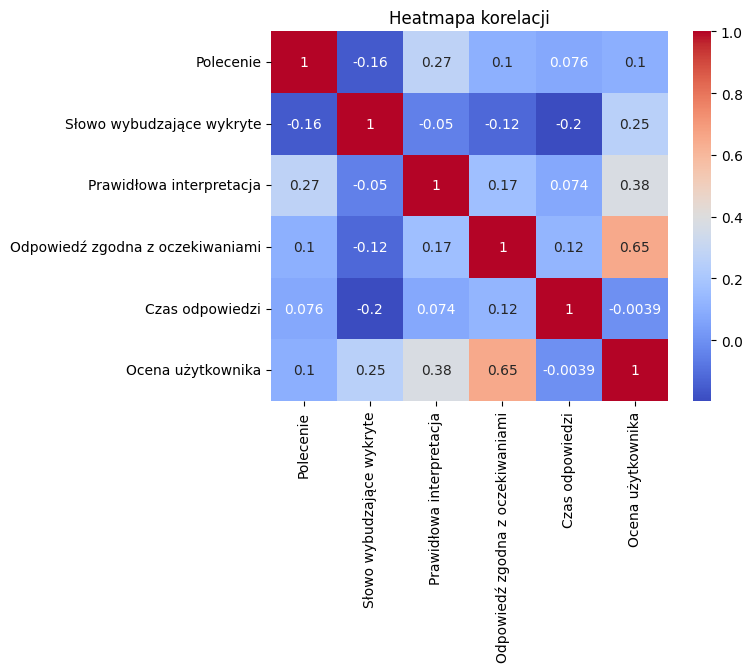

In [8]:
data_numerical = data.copy()
data_numerical["Słowo wybudzające wykryte"] = data_numerical[
    "Słowo wybudzające wykryte"
].replace({"T": 1, "N": 0})
data_numerical["Prawidłowa interpretacja"] = data_numerical[
    "Prawidłowa interpretacja"
].replace({"T": 1, "N": 0})
data_numerical["Odpowiedź zgodna z oczekiwaniami"] = data_numerical[
    "Odpowiedź zgodna z oczekiwaniami"
].replace({"T": 1, "N": 0})

data_numerical = data_numerical.drop(columns=["Uwagi"])
data_numerical = data_numerical.drop(columns=["Nr uczestnika"])

correlation = data_numerical.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Heatmapa korelacji")
plt.show()

In [39]:
print("Uwagi:")
print(data["Uwagi"].dropna().reset_index(drop=True))

Uwagi:
0                  Słowo wybudzające wykryte za 3 razem
1           Asystent nie jest w stanie sprawdzić pogody
2           Asystent nie jest w stanie sprawdzić pogody
3        Asystent myślał, że pytałem o stolicę Iralndii
4                          Bardzo długi czas odpowiedzi
5           Asystent nie jest w stanie sprawdzić pogody
6                  Słowo wybudzające wykryte za 2 razem
7                             Brak odpowiedzi asystenta
8           Asystent nie jest w stanie sprawdzić pogody
9     Trochę długi czas odpowiedzi. Brak puenty dowcipu
10                 Słowo wybudzające wykryte za 2 razem
11                       Asystent nie zrozumiał pytania
12          Asystent nie jest w stanie sprawdzić pogody
13                   Asystent nakłamał w sprawie pogody
14          Asystent nie jest w stanie sprawdzić pogody
15          Asystent nie jest w stanie sprawdzić pogody
16    Słowo wybudzające wykryte za 2 razem i długi c...
17          Asystent nie jest w stanie sp